use KNN to impute after normalizing values in dataset

In [1601]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2>Diabetes Binary Classification Dataset</h2>

Input Features:
'preg_count', 'glucose_concentration', 'diastolic_bp', 'triceps_skin_fold_thickness', two_hr_serum_insulin', 'bmi', 'diabetes_pedi', 'age' <br>

Target Feature: 
'diabetes_class'<br>

Objective: Predict diabetes_class for given input features<br>

<h4>Data Source: https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes </h4>

In [1602]:
columns = ['diabetes_class', 'preg_count', 'glucose_concentration', 'diastolic_bp',
       'triceps_skin_fold_thickness', 'two_hr_serum_insulin', 'bmi',
       'diabetes_pedi', 'age']

In [1603]:
df = pd.read_csv('pima_indians_diabetes_all.csv')

In [1604]:
df.head()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [1605]:
df.shape

(768, 9)

In [1606]:
df.dtypes

preg_count                       int64
glucose_concentration            int64
diastolic_bp                     int64
triceps_skin_fold_thickness      int64
two_hr_serum_insulin             int64
bmi                            float64
diabetes_pedi                  float64
age                              int64
diabetes_class                   int64
dtype: object

In [1607]:
df.describe()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [1608]:
original_mean = df.mean()

In [1609]:
# ---------------------------------------------
# clean up 'wrong' data

In [1610]:
# columns that should have zeros converted to NaN
nan_columns = ['glucose_concentration', 'diastolic_bp',
       'triceps_skin_fold_thickness', 'two_hr_serum_insulin', 'bmi',
       'diabetes_pedi', 'age']

In [1611]:
df.isnull().sum()

preg_count                     0
glucose_concentration          0
diastolic_bp                   0
triceps_skin_fold_thickness    0
two_hr_serum_insulin           0
bmi                            0
diabetes_pedi                  0
age                            0
diabetes_class                 0
dtype: int64

In [1612]:
df[nan_columns] = df[nan_columns].replace({0:np.nan})

In [1613]:
df.isnull().sum()

preg_count                       0
glucose_concentration            5
diastolic_bp                    35
triceps_skin_fold_thickness    227
two_hr_serum_insulin           374
bmi                             11
diabetes_pedi                    0
age                              0
diabetes_class                   0
dtype: int64

In [1614]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [1615]:
scaler = StandardScaler()


In [1616]:
scaled_df = scaler.fit_transform(df.drop(columns=['diabetes_class']))

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [1617]:
scaled_df = pd.DataFrame(scaled_df, columns=columns[1:])

In [1618]:
scaled_df.head()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
0,0.639947,0.862287,-0.032746,0.558557,NaN,0.165097,0.468492,1.425995
1,-0.844885,-1.202229,-0.517645,-0.014657,NaN,-0.846404,-0.365061,-0.190672
2,1.233880,2.009241,-0.679278,NaN,NaN,-1.323254,0.604397,-0.105584
3,-0.844885,-1.071148,-0.517645,-0.587871,-0.518847,-0.629654,-0.920763,-1.041549
4,-1.141852,0.501816,-2.618874,0.558557,0.104968,1.537847,5.484909,-0.020496


In [1619]:
scaled_df['diabetes_class'] = df['diabetes_class']

In [1620]:
scaled_df.head()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
0,0.639947,0.862287,-0.032746,0.558557,NaN,0.165097,0.468492,1.425995,1
1,-0.844885,-1.202229,-0.517645,-0.014657,NaN,-0.846404,-0.365061,-0.190672,0
2,1.233880,2.009241,-0.679278,NaN,NaN,-1.323254,0.604397,-0.105584,1
3,-0.844885,-1.071148,-0.517645,-0.587871,-0.518847,-0.629654,-0.920763,-1.041549,0
4,-1.141852,0.501816,-2.618874,0.558557,0.104968,1.537847,5.484909,-0.020496,1


In [1621]:
scaled_df.shape

(768, 9)

In [1622]:
scaled_df.isnull().sum()

preg_count                       0
glucose_concentration            5
diastolic_bp                    35
triceps_skin_fold_thickness    227
two_hr_serum_insulin           374
bmi                             11
diabetes_pedi                    0
age                              0
diabetes_class                   0
dtype: int64

In [1623]:
scaled_df.dropna().shape

(392, 9)

In [1624]:
xx = scaled_df[scaled_df['glucose_concentration'].isnull()]

In [1625]:
xx.head()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
75,-0.844885,NaN,-1.972342,-0.874478,NaN,-1.120954,-1.002306,-0.956462,0
182,-0.844885,NaN,0.128887,-0.874478,-1.117371,-0.687454,-0.522107,-1.041549,0
342,-0.844885,NaN,-0.356012,0.558557,NaN,-0.066104,-0.250296,-0.956462,0
349,0.342981,NaN,0.613787,0.271950,NaN,1.234397,-0.380161,0.319855,1
502,0.639947,NaN,-0.356012,1.131771,NaN,0.945397,0.770504,0.660206,1


In [1626]:
from sklearn.neighbors import KNeighborsRegressor

def impute_knn(df_original, df_by_class, column_name_to_impute,k=3, verbose=0):
    # dataframe of the rows for the column that have zero values
    df_column_null = df_by_class[df_by_class[column_name_to_impute].isnull()]
    if verbose >= 3:
        print(f"df_zero:\n{df_column_null.head()}")
    
    # training_df is the original df without the rows where the column value was 0
    #training_df = df_by_class.drop(df_by_class[df_by_class[column_name_to_impute].isnull()].index)
    training_df = df_by_class.dropna()
    if verbose >= 1:
        print(f"Original Shape: {df_original.shape}")
        print(f"ByClass Shape: {df_by_class.shape}")
        print(f"Training Shape: {training_df.shape}")
        print(f"Column NaN Shape: {df_column_null.shape}")
        print(f"Column Class Mean: {df_by_class[column_name_to_impute].mean()}")
    
    # X is the df2 dataframe WITHOUT the column to impute
    training_X = training_df.drop(columns=[column_name_to_impute])
    training_y = training_df[column_name_to_impute]
    
    
    knn_regressor_model = KNeighborsRegressor(weights='uniform', n_neighbors=k)
    knn_regressor_model.fit(training_X, training_y)
    
    df_zero_pred_X = df_column_null.drop(columns=[column_name_to_impute])
    df_zero_pred_X = df_zero_pred_X.fillna(0) # if row for the column we are predicting
                                              # has any NaN values, then fill them with zero
    for index, row in df_zero_pred_X.iterrows():
        pred = knn_regressor_model.predict([row]) # predict the new column value
        if verbose >= 2:
            print(f"Index: {index}, Pred: {pred[0]}")
        df_original.at[index, column_name_to_impute] = pred[0]
    
    if verbose >= 1:
        print(f"Updated Mean: {df_original[column_name_to_impute].mean()}")



In [1627]:
k=5

In [1628]:
group_class_orig = scaled_df.groupby('diabetes_class')

In [1629]:
impute_knn(scaled_df, scaled_df[scaled_df['diabetes_class']==1], 'glucose_concentration',k=k, verbose=2)

Original Shape: (768, 9)
ByClass Shape: (268, 9)
Training Shape: (130, 9)
Column NaN Shape: (2, 9)
Column Class Mean: 0.6761384239199102
Index: 349, Pred: 0.8688413841236656
Index: 502, Pred: 0.2724255990971848
Updated Mean: 0.0014918522656482901


In [1630]:
impute_knn(scaled_df, scaled_df[scaled_df['diabetes_class']==0], 'glucose_concentration',k=k, verbose=2)

Original Shape: (768, 9)
ByClass Shape: (500, 9)
Training Shape: (262, 9)
Column NaN Shape: (3, 9)
Column Class Mean: -0.3618769029430503
Index: 75, Pred: -0.8483117551833445
Index: 182, Pred: -0.5730429313249689
Index: 342, Pred: -0.26500400938821517
Updated Mean: -0.0007097548342129913


In [1631]:
impute_knn(scaled_df,scaled_df[scaled_df['diabetes_class']==1], 'diastolic_bp',k=k, verbose=2 )

Original Shape: (768, 9)
ByClass Shape: (268, 9)
Training Shape: (130, 9)
Column NaN Shape: (16, 9)
Column Class Mean: 0.23568069779508408
Index: 15, Pred: 0.19354065984103935
Index: 78, Pred: -0.2751951047984712
Index: 193, Pred: 0.8077461445410876
Index: 261, Pred: -0.38833822040111166
Index: 266, Pred: -0.9378904961853655
Index: 269, Pred: -0.22670519811162532
Index: 300, Pred: -0.09739878028003619
Index: 332, Pred: -0.12972538473793344
Index: 357, Pred: 0.5491333088779095
Index: 435, Pred: -0.2751951047984712
Index: 468, Pred: 0.38750028658842306
Index: 484, Pred: 0.01574433532260433
Index: 535, Pred: -0.29135840702741983
Index: 604, Pred: -0.29135840702741983
Index: 619, Pred: -0.7116042649800846
Index: 706, Pred: 0.3228470776726285
Updated Mean: -0.001800076843130365


In [1632]:
impute_knn(scaled_df,scaled_df[scaled_df['diabetes_class']==0], 'diastolic_bp',k=k, verbose=2 )

Original Shape: (768, 9)
ByClass Shape: (500, 9)
Training Shape: (263, 9)
Column NaN Shape: (19, 9)
Column Class Mean: -0.12347512649555424
Index: 7, Pred: -0.22670519811162526
Index: 49, Pred: -0.9378904961853655
Index: 60, Pred: -0.4529914293169062
Index: 81, Pred: -0.19437859365372803
Index: 172, Pred: -0.6469510560642899
Index: 222, Pred: -0.12972538473793344
Index: 336, Pred: -0.4206648248590089
Index: 347, Pred: -0.7116042649800844
Index: 426, Pred: 0.0965608464673475
Index: 430, Pred: -0.8409106828116736
Index: 453, Pred: -0.12972538473793352
Index: 494, Pred: -0.3560116159432144
Index: 522, Pred: -0.16205198919583072
Index: 533, Pred: -0.873237287269571
Index: 589, Pred: -1.1641767273906465
Index: 601, Pred: -0.4206648248590089
Index: 643, Pred: -0.6146244516063927
Index: 697, Pred: -1.0348703095590575
Index: 703, Pred: 0.19354065984103935
Updated Mean: -0.013509558034477273


In [1633]:
impute_knn(scaled_df,scaled_df[scaled_df['diabetes_class']==1], 'triceps_skin_fold_thickness',k=k, verbose=2)

Original Shape: (768, 9)
ByClass Shape: (268, 9)
Training Shape: (130, 9)
Column NaN Shape: (88, 9)
Column Class Mean: 0.36748562437424176
Index: 2, Pred: -0.0337641765402956
Index: 9, Pred: 0.2719499574898282
Index: 11, Pred: 0.9215924923038413
Index: 15, Pred: 0.13820002385164906
Index: 17, Pred: 0.17641429060541444
Index: 22, Pred: 0.48212842463553834
Index: 26, Pred: 1.2081994929570823
Index: 61, Pred: 0.4821284246355383
Index: 64, Pred: 0.04266435696723534
Index: 72, Pred: 0.40569989112800736
Index: 78, Pred: 0.3292713576204764
Index: 84, Pred: 1.4183779601027926
Index: 93, Pred: -0.3012640438166539
Index: 100, Pred: 0.9024853589269586
Index: 115, Pred: -0.03376417654029561
Index: 116, Pred: 0.4821284246355383
Index: 124, Pred: 0.023557223590352627
Index: 129, Pred: -0.6642995779774259
Index: 131, Pred: -0.12929984342470927
Index: 143, Pred: 0.23373569073606268
Index: 154, Pred: 0.42480702450489016
Index: 164, Pred: 0.6923068917812485
Index: 170, Pred: 0.19552142398229727
Index: 1

In [1634]:
impute_knn(scaled_df,scaled_df[scaled_df['diabetes_class']==0], 'triceps_skin_fold_thickness',k=k, verbose=2)

Original Shape: (768, 9)
ByClass Shape: (500, 9)
Training Shape: (263, 9)
Column NaN Shape: (139, 9)
Column Class Mean: -0.18323382932787682
Index: 5, Pred: -0.721620978108074
Index: 7, Pred: 0.7878425586656622
Index: 10, Pred: 0.5585569581430694
Index: 12, Pred: 0.08087862372100083
Index: 21, Pred: 0.48212842463553834
Index: 29, Pred: -0.6260853112236604
Index: 33, Pred: -1.39037064629897
Index: 36, Pred: -0.03376417654029558
Index: 41, Pred: 0.5394498247661866
Index: 44, Pred: 0.1190928904747663
Index: 46, Pred: -0.43501397745483317
Index: 49, Pred: -0.224835510309123
Index: 58, Pred: 0.9980210258113722
Index: 60, Pred: -0.35858544394730213
Index: 62, Pred: -0.3967997107010676
Index: 67, Pred: 0.940699625680724
Index: 76, Pred: 0.32927135762047643
Index: 81, Pred: -0.3967997107010676
Index: 90, Pred: -0.6834067113543087
Index: 101, Pred: -1.0846565122688463
Index: 102, Pred: -0.7407281114849569
Index: 104, Pred: 1.0362352925651377
Index: 106, Pred: -1.0846565122688463
Index: 113, Pre

In [1635]:
impute_knn(scaled_df,scaled_df[scaled_df['diabetes_class']==0], 'two_hr_serum_insulin',k=k, verbose=2)

Original Shape: (768, 9)
ByClass Shape: (500, 9)
Training Shape: (263, 9)
Column NaN Shape: (236, 9)
Column Class Mean: -0.21294278999301267
Index: 1, Pred: -0.7616286746844758
Index: 5, Pred: -0.5525665544593753
Index: 7, Pred: -0.02485329937504881
Index: 10, Pred: -0.3772241310447748
Index: 12, Pred: -0.10746655656077402
Index: 21, Pred: -0.27775102545379954
Index: 29, Pred: -0.08386276879342394
Index: 30, Pred: -0.36710822200162474
Index: 33, Pred: -0.793662386654451
Index: 34, Pred: -0.4058858733336999
Index: 36, Pred: 0.32751753229467717
Index: 41, Pred: 0.598961091619203
Index: 42, Pred: -0.13107034432812412
Index: 44, Pred: 0.05270200328910144
Index: 46, Pred: 0.04090010940542642
Index: 47, Pred: -0.835812007667576
Index: 49, Pred: -0.5390786757351752
Index: 55, Pred: -0.9083093558101514
Index: 58, Pred: 1.4503834360843304
Index: 60, Pred: -0.7717445837276259
Index: 62, Pred: -0.9302271587369763
Index: 65, Pred: -0.6807014023392757
Index: 67, Pred: -0.09735064751762401
Index: 74

Index: 720, Pred: -0.6638415539340257
Index: 724, Pred: -0.5407646605757003
Index: 725, Pred: -0.38396807040687486
Index: 727, Pred: 0.23984632058737695
Index: 728, Pred: -0.3401324645532246
Index: 729, Pred: -0.44803549434682494
Index: 734, Pred: -0.3401324645532247
Index: 735, Pred: -0.6318078419640505
Index: 737, Pred: -0.7194790536713508
Index: 752, Pred: -0.6688995084556005
Index: 756, Pred: 0.25164821447105196
Index: 758, Pred: -0.48006920631680006
Index: 762, Pred: -0.6216919329209005
Index: 764, Pred: -0.2305434499190994
Index: 767, Pred: -0.5778563270672503
Updated Mean: -0.1260792939668873


In [1636]:
impute_knn(scaled_df, scaled_df[scaled_df['diabetes_class']==1], 'two_hr_serum_insulin',k=k, verbose=2)

Original Shape: (768, 9)
ByClass Shape: (268, 9)
Training Shape: (130, 9)
Column NaN Shape: (138, 9)
Column Class Mean: 0.4324376658319641
Index: 0, Pred: 2.062395933194907
Index: 2, Pred: 0.6343667732702281
Index: 9, Pred: 0.949645938448404
Index: 11, Pred: 0.22635844186317694
Index: 15, Pred: -0.07206087490974893
Index: 17, Pred: -0.2271714802380494
Index: 22, Pred: 0.9058103325947539
Index: 23, Pred: -0.14118625337127413
Index: 26, Pred: 0.244904275108952
Index: 37, Pred: 0.8029652573227285
Index: 38, Pred: -0.23222943475962438
Index: 45, Pred: 1.3627122243770302
Index: 48, Pred: -0.0636309507071239
Index: 61, Pred: -0.18502185922492423
Index: 64, Pred: 0.7675595756717035
Index: 66, Pred: -0.05182905682344887
Index: 72, Pred: 0.40001488043725236
Index: 78, Pred: 0.051016018448576415
Index: 84, Pred: 0.7304679091801534
Index: 93, Pred: 0.9125542719568538
Index: 100, Pred: 0.6343667732702281
Index: 115, Pred: 0.4893720769850777
Index: 116, Pred: 0.08810768494012651
Index: 124, Pred: -

In [1637]:
impute_knn(scaled_df, scaled_df[scaled_df['diabetes_class']==1], 'bmi',k=k, verbose=2 )

Original Shape: (768, 9)
ByClass Shape: (268, 9)
Training Shape: (266, 9)
Column NaN Shape: (2, 9)
Column Class Mean: 0.4261744650155062
Index: 9, Pred: 0.09284653117481169
Index: 706, Pred: -0.19037356593598417
Updated Mean: -0.00012849411694451242


In [1638]:
impute_knn(scaled_df, scaled_df[scaled_df['diabetes_class']==0], 'bmi',k=k, verbose=2 )

Original Shape: (768, 9)
ByClass Shape: (500, 9)
Training Shape: (491, 9)
Column NaN Shape: (9, 9)
Column Class Mean: -0.23088066740147534
Index: 49, Pred: -0.6932337383571935
Index: 60, Pred: -0.2857435986365583
Index: 81, Pred: -0.45336365611029483
Index: 145, Pred: 0.11018653712037078
Index: 371, Pred: -0.7597037611485028
Index: 426, Pred: 0.42519664513135835
Index: 494, Pred: -0.548733688810869
Index: 522, Pred: -0.49093366899233926
Index: 684, Pred: -0.5400636858380895
Updated Mean: -0.0043410412114622465


In [1639]:
scaled_df.isnull().sum()

preg_count                     0
glucose_concentration          0
diastolic_bp                   0
triceps_skin_fold_thickness    0
two_hr_serum_insulin           0
bmi                            0
diabetes_pedi                  0
age                            0
diabetes_class                 0
dtype: int64

In [1640]:
scaled_df.shape

(768, 9)

In [1641]:
scaled_df.describe()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
count,7.680000e+02,768.000000,768.000000,768.000000,768.000000,768.000000,7.680000e+02,7.680000e+02,768.000000
mean,2.544261e-17,-0.000710,-0.013510,-0.005278,-0.031900,-0.004341,2.398978e-16,1.857600e-16,0.348958
std,1.000652e+00,0.998661,0.984231,0.906590,0.815619,0.995035,1.000652e+00,1.000652e+00,0.476951
min,-1.141852e+00,-2.545803,-3.911938,-2.116442,-1.193241,-2.060204,-1.189553e+00,-1.041549e+00,0.000000
25%,-8.448851e-01,-0.743447,-0.679278,-0.669076,-0.576170,-0.716354,-6.889685e-01,-7.862862e-01,0.000000
50%,-2.509521e-01,-0.153586,-0.032746,-0.005103,-0.215370,-0.044429,-3.001282e-01,-3.608474e-01,0.000000
75%,6.399473e-01,0.632897,0.613787,0.558557,0.267244,0.598597,4.662269e-01,6.602056e-01,1.000000
max,3.906578e+00,2.533562,4.008080,6.672840,5.820456,5.005848,5.883565e+00,4.063716e+00,1.000000


In [1642]:
scaled_df.head()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
0,0.639947,0.862287,-0.032746,0.558557,2.062396,0.165097,0.468492,1.425995,1
1,-0.844885,-1.202229,-0.517645,-0.014657,-0.761629,-0.846404,-0.365061,-0.190672,0
2,1.233880,2.009241,-0.679278,-0.033764,0.634367,-1.323254,0.604397,-0.105584,1
3,-0.844885,-1.071148,-0.517645,-0.587871,-0.518847,-0.629654,-0.920763,-1.041549,0
4,-1.141852,0.501816,-2.618874,0.558557,0.104968,1.537847,5.484909,-0.020496,1


In [1643]:
group_class = scaled_df.groupby('diabetes_class')

In [1644]:
group_class.mean()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
diabetes_class,,,,,,,,
0,-0.162456,-0.363078,-0.136837,-0.184176,-0.271294,-0.233198,-0.127275,-0.174505
1,0.303090,0.675351,0.216579,0.328487,0.414730,0.422630,0.237453,0.325569


In [1645]:
group_class_orig.mean()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age
diabetes_class,,,,,,,,
0,-0.162456,-0.363078,-0.136837,-0.184176,-0.271294,-0.233198,-0.127275,-0.174505
1,0.303090,0.675351,0.216579,0.328487,0.414730,0.422630,0.237453,0.325569


In [1646]:
#---- End Data Clean UP

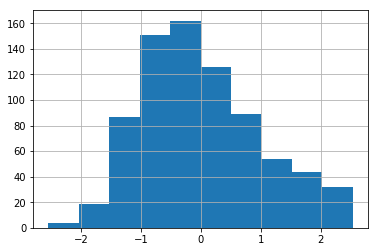

In [1647]:
scaled_df['glucose_concentration'].hist()
plt.show()

In [1648]:
scaled_df['diabetes_class'].value_counts()

0    500
1    268
Name: diabetes_class, dtype: int64

In [1649]:
# Separate diabetic and normal samples
diabetic = scaled_df.diabetes_class == 1
normal = scaled_df.diabetes_class == 0

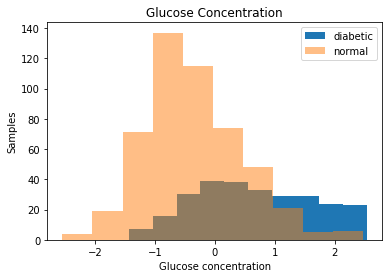

In [1650]:
# Glucose concentration histogram
plt.hist(scaled_df[diabetic].glucose_concentration,label='diabetic')
plt.hist(scaled_df[normal].glucose_concentration,alpha=0.5,label='normal')
plt.title('Glucose Concentration')
plt.xlabel('Glucose concentration')
plt.ylabel('Samples')
plt.legend()
plt.show()

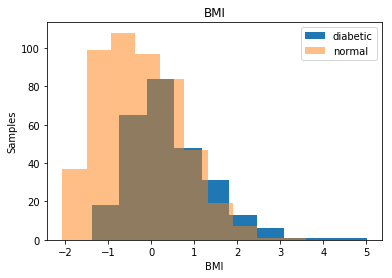

In [1651]:
# BMI histogram
plt.hist(scaled_df[diabetic].bmi,label='diabetic')
plt.hist(scaled_df[normal].bmi,alpha=0.5,label='normal')
plt.title('BMI')
plt.xlabel('BMI')
plt.ylabel('Samples')
plt.legend()
plt.show()

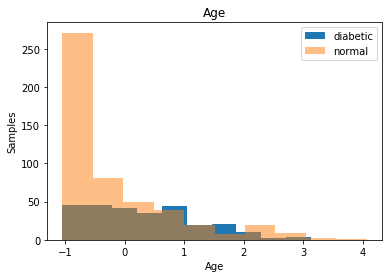

In [1652]:
# Age
plt.hist(scaled_df[diabetic].age,label='diabetic')
plt.hist(scaled_df[normal].age,alpha=0.5,label='normal')
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Samples')
plt.legend()
plt.show()

## Training and Validation Set
### Target Variable as first column followed by input features:
'diabetes_class', 'preg_count', 'glucose_concentration', 'diastolic_bp',
       'triceps_skin_fold_thickness', 'two_hr_serum_insulin', 'bmi',
       'diabetes_pedi', 'age'
### Training, Validation files do not have a column header

In [1653]:
# Training = 70% of the data
# Validation = 30% of the data
# Randomize the datset
np.random.seed(5)
l = list(scaled_df.index)
np.random.shuffle(l)
df_shuffled = scaled_df.iloc[l]

In [1654]:
rows = df_shuffled.shape[0]
train = int(.7 * rows)
test = rows - train

In [1655]:
rows, train, test

(768, 537, 231)

In [1656]:
# Write Training Set
df_shuffled[:train].to_csv('diabetes_train.csv'
                          ,index=False,index_label='Row',header=False
                          ,columns=columns)

In [1657]:
# Write Validation Set
df_shuffled[train:].to_csv('diabetes_validation.csv'
                          ,index=False,index_label='Row',header=False
                          ,columns=columns)

In [1658]:
# Write Column List
with open('diabetes_train_column_list.txt','w') as f:
    f.write(','.join(columns))